# Solving the case of protein interaction on the membrane
In this problem we are trying to find concentrations of protain in time when the proteins are interacting on the membrane.

The chemical equations we are dealing with are:

$\ce{2A<->A2} \newline $
$\ce{2A2<->A4} \newline $
where A is the protein of interest.
 
When looking at the concentrations we can write the aquations as,

$\frac{d[A]}{dt}=-2k^1_{on}[A]^2 + k^1_{off}[A_2] \newline$
$\frac{d[A_2]}{dt}=2k^1_{on}[A]^2 - k^1_{off}[A_2]- 2k^2_{on}[A_2]^2 + k^2_{off}[A_4] \newline$
$\frac{d[A_4]}{dt}=2k^2_{on}[A_2]^2 - k^2_{off}[A_4] \newline$

In case of steady state the derivative in respect to time is zero

In [212]:
using OrdinaryDiffEq
using Plots

In [182]:
function trueODEfunc(dydt, y, k, t)
    dydt[1] = -2 * k[1] * y[1]^2 + 2 * k[2] * y[2];
    dydt[2] = k[1] * y[1]^2 - k[2] * y[2] - 2 * k[3] * y[2]^2 + 2 * k[4] * y[3];
    dydt[3] = k[3] * y[2]^2 - k[4] * y[3];
end

trueODEfunc (generic function with 1 method)

## Parametrs definition

ns - number of species. <br>
n_exp_train - number of samples for training. <br>
n_exp_test - number of samples for testing. <br>
datasize - the size of the data in the time domain, i.e. number of time points. <br>
tstep - lenght of a time step. <br>
k - reactions rate constant. <br>
noise - noise level of the experiment. <br>
alg - Algorithm chosen from algorithm lists in Julia to solve the ODE numerically.

In [185]:
ns = 3;
n_exp_train = 20;
n_exp_test = 10;
n_exp = n_exp_train + n_exp_test;
datasize = 2000;
tstep = 0.005;
k = Float32[0.1, 0.2, 0.13, 0.3];
noise = 5.f-3;
alg = Tsit5();

## Generating data using ODE solution

as well as plotting the data

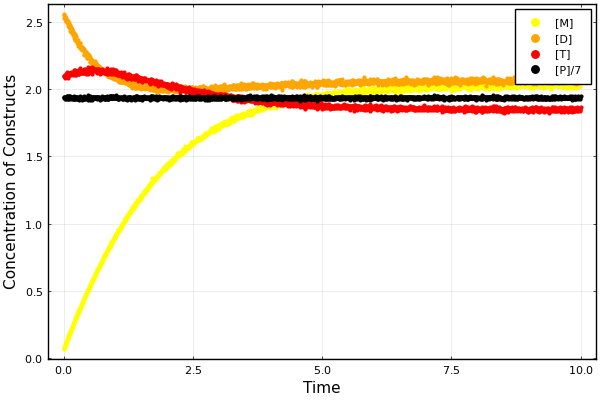

In [216]:
Conc_Range = 5;
u0_list = Conc_Range * rand(Float32, (n_exp, ns));
tspan = Float32[0.0, datasize * tstep];
tsteps = range(tspan[1], tspan[2], length=datasize);
ode_data_list = zeros(Float32, (n_exp, ns, datasize));
std_list = [];
for i in 1:n_exp
    u0 = u0_list[i, :];
    prob_trueode = ODEProblem(trueODEfunc, u0, tspan, k);
    ode_data = Array(solve(prob_trueode, alg, saveat=tsteps));
    ode_data += randn(size(ode_data)) .* ode_data .* noise
    ode_data_list[i, :, :] = ode_data
end
Total_Protein = ode_data_list[1,1,:] + 2*ode_data_list[1,2,:] + 4*ode_data_list[1,3,:];

plt = scatter(tsteps, ode_data_list[1,1,:], markercolor = :yellow, markersize = 3, markerstrokewidth = 0,
              label="[M]", framestyle=:box)
scatter!(plt, tsteps, ode_data_list[1,2,:], markercolor=:orange, markersize = 3, markerstrokewidth = 0, 
         label="[D]")
scatter!(plt, tsteps, ode_data_list[1,3,:], markercolor=:red, markersize = 3, markerstrokewidth = 0, 
         label="[T]")
scatter!(plt, tsteps, Total_Protein/7, markercolor=:black, markersize = 3, markerstrokewidth = 0, 
         label="[P]/7")
plot!(xlabel="Time", ylabel="Concentration of Constructs")